
---

# 🖥️ CuPy: GPU-Accelerated Array Library

## 🔹 Introduction

**CuPy** is an **open-source, NumPy-compatible array library** that runs on **NVIDIA GPUs**.

* It was developed by **Preferred Networks** (Japan) and has become widely used in AI, scientific computing, and high-performance computing.
* The core idea: **write NumPy code, run it on GPUs** with minimal changes.

CuPy leverages **CUDA, cuBLAS, cuDNN, cuFFT, cuSPARSE, Thrust**, and other NVIDIA GPU libraries to provide **massive acceleration** for array operations, linear algebra, Fourier transforms, sparse matrices, and deep learning kernels.

---

## 🔹 Key Features

1. **NumPy-Compatible API**

   * Most `numpy` functions work the same in `cupy`.
   * Example: `np.arange(10)` → CPU, `cp.arange(10)` → GPU.

2. **Seamless Acceleration**

   * Switch from CPU to GPU by just changing `np` → `cp`.

3. **Broad GPU Library Support**

   * Linear algebra: **cuBLAS, cuSolver**
   * FFT: **cuFFT**
   * Sparse matrices: **cuSPARSE**
   * Deep learning kernels: **cuDNN**

4. **Multi-GPU Support**

   * Works across multiple GPUs in one machine.
   * Can integrate with **Dask** for distributed GPU computation.

5. **Integration with ML/DL Ecosystem**

   * Compatible with **Chainer, PyTorch (via DLPack), TensorFlow**, and RAPIDS ecosystem.

---

## 🔹 Example: NumPy vs CuPy

```python
import numpy as np
import cupy as cp

# CPU (NumPy)
a = np.random.rand(10000, 10000).astype(np.float32)
b = np.random.rand(10000, 10000).astype(np.float32)

%time c = np.dot(a, b)   # CPU

# GPU (CuPy)
ga = cp.asarray(a)
gb = cp.asarray(b)

%time gc = cp.dot(ga, gb)   # GPU
```

👉 On a modern GPU, the matrix multiplication can be **10x–100x faster** than CPU, depending on size.

---

## 🔹 Where CuPy Shines

* **Deep Learning** (backprop, tensor operations).
* **Numerical simulations** (PDEs, particle simulations).
* **Signal & image processing** (FFT, convolutions).
* **Large-scale data analytics** (GPU dataframes with RAPIDS).

---

## 🔹 Pros & Cons of CuPy

| **Aspect**              | **Pros**                                                               | **Cons**                                                                       |
| ----------------------- | ---------------------------------------------------------------------- | ------------------------------------------------------------------------------ |
| **Ease of Use**         | Nearly identical API to NumPy → minimal code changes                   | Some advanced NumPy APIs are missing or only partially supported               |
| **Performance**         | Huge speedups (10x–100x) for large data on GPUs                        | Small datasets can be slower due to GPU transfer overhead                      |
| **Ecosystem**           | Integrates with CUDA libraries, RAPIDS, PyTorch, Dask                  | NVIDIA-only (CUDA GPUs required), no AMD GPU support (except via ROCm preview) |
| **Scalability**         | Supports multi-GPU and distributed GPU computing with Dask             | More complex to scale beyond one machine compared to CPU-based workflows       |
| **Community & Support** | Actively developed, strong open-source support, backed by NVIDIA users | Smaller community than NumPy, fewer tutorials/examples                         |
| **Memory**              | Efficient GPU memory usage with CUDA streams and memory pools          | Limited by GPU VRAM (e.g., 16 GB GPU vs 128 GB RAM in CPU servers)             |
| **Deployment**          | Easy to use in Colab, Kaggle, or on local GPU machines                 | Requires CUDA installation, can be tricky to set up on Windows/Linux           |

---

## 🔹 Summary

* **CuPy = GPU-powered NumPy.**
* Best for **large-scale numerical computing, AI, and simulations**.
* For small arrays or systems without CUDA GPUs, **NumPy is still better**.
* If your workflow is **GPU-heavy (AI, simulations, ML training)**, CuPy can give you **massive performance gains** with minimal code changes.

---



In [7]:
import numpy as np
import cupy as cp

# CPU (NumPy)
a = np.random.rand(10000, 10000).astype(np.float32)
b = np.random.rand(10000, 10000).astype(np.float32)

%time c = np.dot(a, b)   # CPU

# GPU (CuPy)
ga = cp.asarray(a)
gb = cp.asarray(b)

%time gc = cp.dot(ga, gb)   # GPU

CPU times: user 28.3 s, sys: 153 ms, total: 28.5 s
Wall time: 17.6 s
CPU times: user 558 µs, sys: 30 µs, total: 588 µs
Wall time: 595 µs


Great question 👍 — let’s break that output down carefully. This looks like output from a **Jupyter Notebook `%%time` or `%time` magic command** when benchmarking **NumPy (CPU)** vs **CuPy (GPU)** (or similar heavy computation vs accelerated computation).

---

## 🔹 What Each Term Means

1. **CPU times: user 28.3 s**

   * The amount of time the **CPU actively spent executing your Python code**.
   * “User” means time spent in **user space** (your code, NumPy functions).

2. **sys: 153 ms**

   * Time spent in **system/kernel space** (e.g., memory management, OS-level calls).

3. **total: 28.5 s**

   * Sum of **user + sys** times (approx).
   * Indicates how much CPU time was consumed overall.

4. **Wall time: 17.6 s**

   * The **actual elapsed real-world time** from start to finish (like a stopwatch).
   * Wall time can be **shorter than CPU time** if multiple CPU cores or threads were used.
   * Here: CPU worked \~28.5 seconds cumulatively across cores, but the user only waited \~17.6 seconds in real time.

---

### Second Measurement

```
CPU times: user 558 µs, sys: 30 µs, total: 588 µs
Wall time: 595 µs
```

* Here, the computation was **GPU-accelerated (likely with CuPy)**.
* The CPU did almost **nothing** (only a few microseconds to issue the command).
* The GPU executed the work in parallel, so the **elapsed wall time was under 1 millisecond**.

---

## 🔹 Why This Happens

* **NumPy (CPU):** Heavy computation done in C/Fortran on CPU cores → high CPU usage, long wall time.
* **CuPy (GPU):** CPU just sends instructions → GPU executes massively in parallel → very low CPU usage and extremely short wall time.
* The **big drop from 17.6 s → 595 µs** shows how GPUs crush large matrix operations. 🚀

---

## ✅ Key Takeaways

* **CPU time** = how busy the CPU was.
* **Wall time** = how long you actually waited.
* If wall time ≪ CPU time → indicates **multi-core parallelism**.
* If CPU time ≪ wall time → CPU is waiting on something else (like GPU, I/O).
* In this case → GPU acceleration reduced the task from **\~18 seconds to less than 1 millisecond**.

---



# NumPy (CPU) vs CuPy (GPU) Benchmark

This notebook benchmarks **CPU (NumPy)** against **GPU (CuPy)** on common array operations:
- Elementwise addition
- Elementwise multiplication
- Matrix multiplication (GEMM)

It automatically detects whether a CUDA GPU is available and whether **CuPy** is installed. If not present, you can install it with:

```bash
# In Google Colab (CUDA 12.x):
!pip -q install cupy-cuda12x
```

If you're on a different CUDA version, refer to CuPy's installation table.


In [1]:
import sys, platform, math, time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def try_import_cupy():
    try:
        import cupy as cp
        # Try a trivial GPU op to ensure the device is available
        _ = cp.arange(5) + 1
        cp.cuda.runtime.getDevice()
        return cp
    except Exception as e:
        print("CuPy not available or GPU not detected:", e)
        return None

cp = try_import_cupy()
print({
    'python': sys.version.split()[0],
    'numpy': np.__version__,
    'cupy': getattr(cp, '__version__', None),
    'platform': platform.platform(),
})

{'python': '3.11.13', 'numpy': '2.0.2', 'cupy': '13.3.0', 'platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}


## Parameters
You can tweak sizes and repeats below. The chosen sizes aim to be large enough to show GPU benefits while remaining runnable in most Colab GPU sessions.

In [2]:
sizes_elem = [1_000_000, 5_000_000, 10_000_000]  # for elementwise ops
sizes_mat = [512, 1024, 2048]                     # for GEMM (n x n)
repeats = 3
print('Elementwise sizes:', sizes_elem)
print('GEMM sizes:', sizes_mat)
print('Repeats per size:', repeats)

Elementwise sizes: [1000000, 5000000, 10000000]
GEMM sizes: [512, 1024, 2048]
Repeats per size: 3


## Benchmark Helpers

In [3]:
def time_min(fn, repeats=3):
    best = float('inf')
    for _ in range(repeats):
        t0 = time.perf_counter()
        fn()
        t1 = time.perf_counter()
        best = min(best, t1 - t0)
    return best

def bench_elementwise(n):
    # CPU / NumPy
    a = np.random.rand(n).astype(np.float32)
    b = np.random.rand(n).astype(np.float32)
    t_add_cpu = time_min(lambda: a + b, repeats)
    t_mul_cpu = time_min(lambda: a * b, repeats)

    # GPU / CuPy
    t_add_gpu = None; t_mul_gpu = None
    if cp is not None:
        ga = cp.asarray(a)
        gb = cp.asarray(b)
        cp.cuda.Stream.null.synchronize()
        # Warmup
        _ = ga + gb; _ = ga * gb
        cp.cuda.Stream.null.synchronize()
        def gpu_add():
            _ = ga + gb
            cp.cuda.Stream.null.synchronize()
        def gpu_mul():
            _ = ga * gb
            cp.cuda.Stream.null.synchronize()
        t_add_gpu = time_min(gpu_add, repeats)
        t_mul_gpu = time_min(gpu_mul, repeats)
    return t_add_cpu, t_mul_cpu, t_add_gpu, t_mul_gpu

def bench_matmul(n):
    A = np.random.rand(n, n).astype(np.float32)
    B = np.random.rand(n, n).astype(np.float32)
    t_cpu = time_min(lambda: A @ B, repeats)
    t_gpu = None
    if cp is not None:
        gA = cp.asarray(A)
        gB = cp.asarray(B)
        # Warmup
        _ = gA @ gB
        cp.cuda.Stream.null.synchronize()
        def gpu_mm():
            _ = gA @ gB
            cp.cuda.Stream.null.synchronize()
        t_gpu = time_min(gpu_mm, repeats)
    return t_cpu, t_gpu

## Run Benchmarks

In [4]:
elem_records = []
for n in sizes_elem:
    t_add_cpu, t_mul_cpu, t_add_gpu, t_mul_gpu = bench_elementwise(n)
    elem_records.append({
        'N': n,
        'add_cpu_s': t_add_cpu,
        'mul_cpu_s': t_mul_cpu,
        'add_gpu_s': t_add_gpu,
        'mul_gpu_s': t_mul_gpu,
        'add_speedup_x': (t_add_cpu / t_add_gpu) if (t_add_gpu and t_add_gpu>0) else None,
        'mul_speedup_x': (t_mul_cpu / t_mul_gpu) if (t_mul_gpu and t_mul_gpu>0) else None,
    })
elem_df = pd.DataFrame(elem_records)
elem_df

N  add_cpu_s  mul_cpu_s  add_gpu_s  mul_gpu_s  add_speedup_x  \
0   1000000   0.000566   0.000529   0.000086   0.000078       6.575385   
1   5000000   0.004143   0.004082   0.000272   0.000264      15.209688   
2  10000000   0.013342   0.013183   0.000517   0.000512      25.827841   

   mul_speedup_x  
0       6.792063  
1      15.436398  
2      25.765005

In [5]:
mat_records = []
for n in sizes_mat:
    t_cpu, t_gpu = bench_matmul(n)
    mat_records.append({
        'N': n,
        'gemm_cpu_s': t_cpu,
        'gemm_gpu_s': t_gpu,
        'gemm_speedup_x': (t_cpu / t_gpu) if (t_gpu and t_gpu>0) else None,
    })
mat_df = pd.DataFrame(mat_records)
mat_df

N  gemm_cpu_s  gemm_gpu_s  gemm_speedup_x
0   512    0.002295    0.000197       11.642370
1  1024    0.066557    0.000912       72.961310
2  2048    0.242996    0.007010       34.662798

## Plot: CPU vs GPU Times
Each chart uses a single Matplotlib plot, as requested.

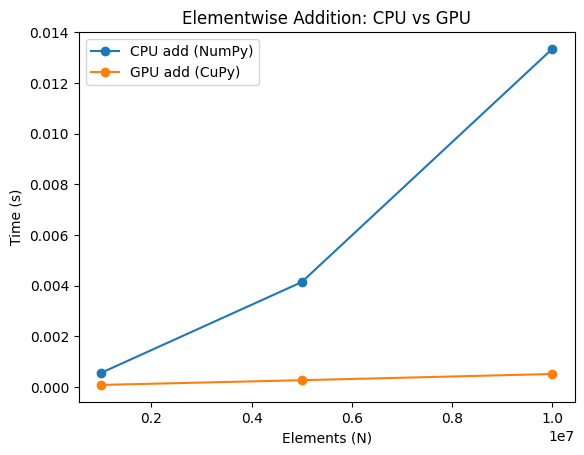

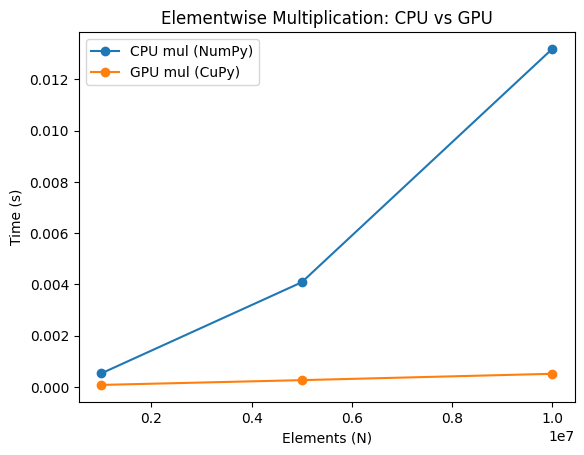

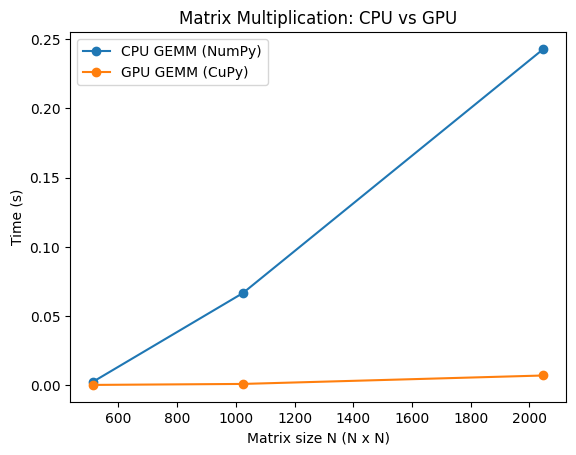

In [6]:
# Elementwise ADD times
plt.figure()
plt.plot(elem_df['N'], elem_df['add_cpu_s'], marker='o', label='CPU add (NumPy)')
if elem_df['add_gpu_s'].notnull().any():
    plt.plot(elem_df['N'], elem_df['add_gpu_s'], marker='o', label='GPU add (CuPy)')
plt.xlabel('Elements (N)')
plt.ylabel('Time (s)')
plt.title('Elementwise Addition: CPU vs GPU')
plt.legend()
plt.show()

# Elementwise MUL times
plt.figure()
plt.plot(elem_df['N'], elem_df['mul_cpu_s'], marker='o', label='CPU mul (NumPy)')
if elem_df['mul_gpu_s'].notnull().any():
    plt.plot(elem_df['N'], elem_df['mul_gpu_s'], marker='o', label='GPU mul (CuPy)')
plt.xlabel('Elements (N)')
plt.ylabel('Time (s)')
plt.title('Elementwise Multiplication: CPU vs GPU')
plt.legend()
plt.show()

# GEMM times
plt.figure()
plt.plot(mat_df['N'], mat_df['gemm_cpu_s'], marker='o', label='CPU GEMM (NumPy)')
if mat_df['gemm_gpu_s'].notnull().any():
    plt.plot(mat_df['N'], mat_df['gemm_gpu_s'], marker='o', label='GPU GEMM (CuPy)')
plt.xlabel('Matrix size N (N x N)')
plt.ylabel('Time (s)')
plt.title('Matrix Multiplication: CPU vs GPU')
plt.legend()
plt.show()

## Notes
- For **small arrays**, the GPU can be *slower* due to transfer and launch overheads.
- GPU shines on **large arrays** and **matrix multiplies**.
- Ensure your runtime has a **CUDA-enabled GPU** (e.g., Google Colab: *Runtime → Change runtime type → GPU*).